# Лаб работа №3
Вариант 6 - Продажа домов в округе кинг
## Бизнес-цели:
**1. Автоматизация и повышение точности оценки стоимости недвижимости:**
* **Формулировка:** Разработать модель машинного обучения, которая с высокой точностью и на основе данных (площадь, количество комнат, состояние, местоположение) автоматически оценивает стоимость дома.
* **Цель:** Повысить точность оценки для агентств недвижимости и покупателей, сократить время и затраты на оценку, обеспечив более точный прогноз цены.
* **Ключевые показатели успеха (KPI):**
    * **Точность прогнозирования (RMSE):** Достичь среднеквадратичной ошибки менее 10% от реальной цены, чтобы учесть значительные отклонения.
    * **Средняя абсолютная ошибка (MAE):** Снизить MAE до 5% или менее, чтобы модель предсказывала цену с минимальной погрешностью.
    * **Скорость оценки:** Сократить время на оценку стоимости дома для быстрого получения результатов.
    * **Доступность:** Интегрировать модель в систему для использования агентствами недвижимости.

**2. Оптимизация затрат на ремонт перед продажей:**
* **Формулировка:** Разработать модель, которая поможет продавцам и агентствам недвижимости определить наиболее эффективные и выгодные ремонтные работы, увеличивающие стоимость дома при минимальных затратах.
* **Цель:** Минимизировать затраты на ремонт, рекомендуя только те улучшения, которые максимально повысят стоимость недвижимости, и ускорить принятие решений о ремонте.
* **Ключевые показатели успеха (KPI):**
    * **Возврат инвестиций (ROI):** Обеспечить прирост стоимости дома не менее 20% на каждый вложенный доллар в ремонт. Например, увеличение цены на $12,000 после траты $10,000 на ремонт.
    * **Средняя стоимость ремонта на сделку (CPA):** Снизить расходы на ремонт до $5,000 на дом, учитывая максимальный прирост стоимости.
    * **Сокращение времени на принятие решений:** Уменьшить время оценки вариантов ремонта до нескольких минут, чтобы ускорить подготовку дома к продаже.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

df = pd.read_csv(".//static//csv//kc_house_data.csv")
print(df.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [2]:
df.head()


id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [12]:
from sklearn.model_selection import train_test_split

# Разделение данных на обучающую и тестовую выборки (80% - обучение, 20% - тестовая)
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Разделение данных на обучающую и контрольную выборки (80% - обучение, 20% - контроль)
train_data, val_data = train_test_split(df, test_size=0.2, random_state=42)

print("Размер обучающей выборки: ", len(train_data))
print("Размер контрольной выборки: ", len(val_data))
print("Размер тестовой выборки: ", len(test_data))

Размер обучающей выборки:  17290
Размер контрольной выборки:  4323
Размер тестовой выборки:  4323


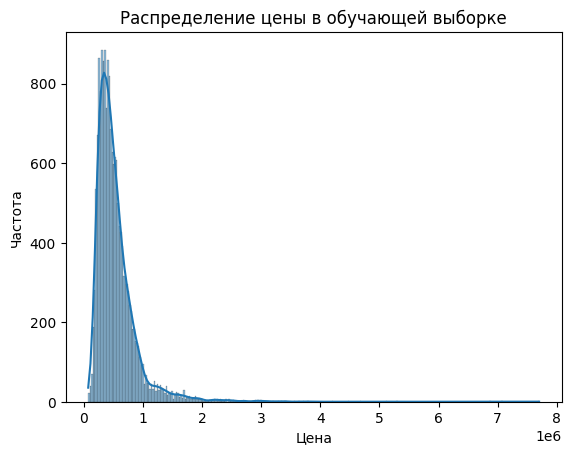

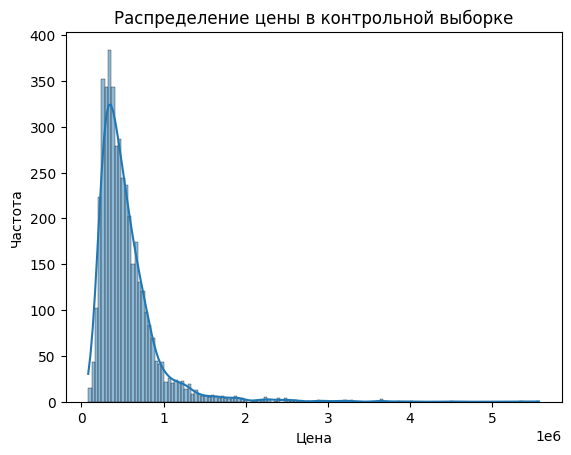

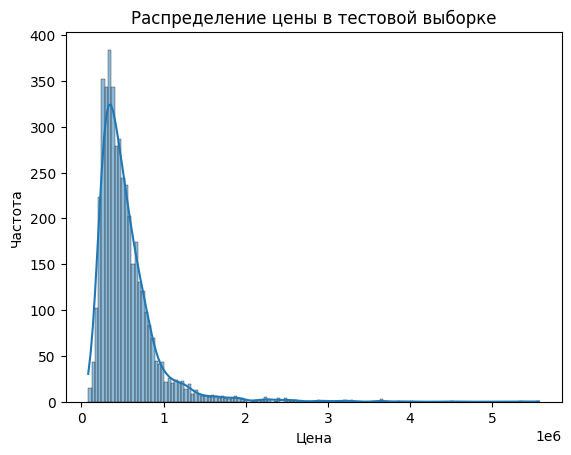

Средняя цена в обучающей выборке:  537768.04794679
Средняя цена в контрольной выборке:  549367.443673375
Средняя цена в тестовой выборке:  549367.443673375


In [13]:
# Оценка сбалансированности целевой переменной (цена)
# Визуализация распределения цены в выборках (гистограмма)
def plot_price_distribution(data, title):
    sns.histplot(data['price'], kde=True)
    plt.title(title)
    plt.xlabel('Цена')
    plt.ylabel('Частота')
    plt.show()

plot_price_distribution(train_data, 'Распределение цены в обучающей выборке')
plot_price_distribution(val_data, 'Распределение цены в контрольной выборке')
plot_price_distribution(test_data, 'Распределение цены в тестовой выборке')

# Оценка сбалансированности данных по целевой переменной (price)
print("Средняя цена в обучающей выборке: ", train_data['price'].mean())
print("Средняя цена в контрольной выборке: ", val_data['price'].mean())
print("Средняя цена в тестовой выборке: ", test_data['price'].mean())

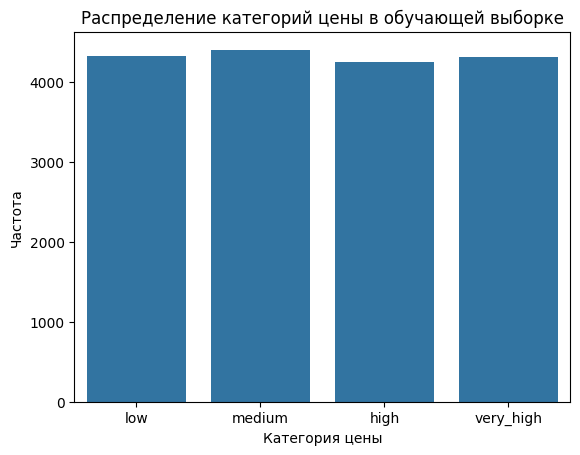

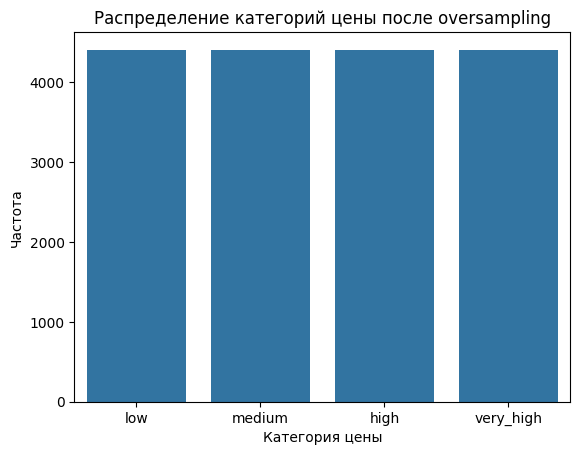

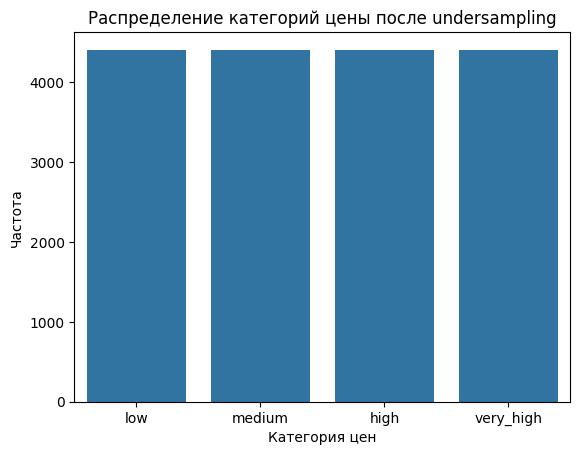

Размер обучающей выборки после oversampling и undersampling:  17620


In [14]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Преобразование целевой переменной (цены) в категориальные диапазоны с использованием квантилей
train_data['price_category'] = pd.qcut(train_data['price'], q=4, labels=['low', 'medium', 'high', 'very_high'])

# Визуализация распределения цен после преобразования в категории
sns.countplot(x=train_data['price_category'])
plt.title('Распределение категорий цены в обучающей выборке')
plt.xlabel('Категория цены')
plt.ylabel('Частота')
plt.show()

# Балансировка категорий с помощью RandomOverSampler (увеличение меньшинств)
ros = RandomOverSampler(random_state=42)
X_train = train_data.drop(columns=['price', 'price_category'])
y_train = train_data['price_category']

X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Визуализация распределения цен после oversampling
sns.countplot(x=y_resampled)
plt.title('Распределение категорий цены после oversampling')
plt.xlabel('Категория цены')
plt.ylabel('Частота')
plt.show()

# Применение RandomUnderSampler для уменьшения большего класса
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_resampled, y_resampled)

# Визуализация распределения цен после undersampling
sns.countplot(x=y_resampled)
plt.title('Распределение категорий цены после undersampling')
plt.xlabel('Категория цен')
plt.ylabel('Частота')
plt.show()

# Печать размеров выборки после балансировки
print("Размер обучающей выборки после oversampling и undersampling: ", len(X_resampled))

## Конструирование признаков

Задача 1: Прогнозирование цен недвижимости. Цель технического проекта: Разработка модели машинного обучения для точного прогнозирования рыночной стоимости недвижимости.
Задача 2: Оптимизация затрат на ремонт перед продажей. Цель технического проекта: Разработка модели машинного обучения для точного прогнозирования по рекомендациям по реновациям.

Унитарное кодирование
Унитарное кодирование категориальных признаков (one-hot encoding). Преобразование категориальных признаков в бинарные векторы.

Дискретизация числовых признаков
Процесс преобразования непрерывных числовых значений в дискретные категории или интервалы (бины).

In [15]:
# Конструирование признаков
# Унитарное кодирование категориальных признаков (применение one-hot encoding)

# Пример категориальных признаков
categorical_features = ['date', 'waterfront', 'view', 'condition']

# Применение one-hot encoding
train_data_encoded = pd.get_dummies(train_data, columns=categorical_features)
val_data_encoded = pd.get_dummies(val_data, columns=categorical_features)
test_data_encoded = pd.get_dummies(test_data, columns=categorical_features)
df_encoded = pd.get_dummies(df, columns=categorical_features)

print("Столбцы train_data_encoded:", train_data_encoded.columns.tolist())
print("Столбцы val_data_encoded:", val_data_encoded.columns.tolist())
print("Столбцы test_data_encoded:", test_data_encoded.columns.tolist())


# Дискретизация числовых признаков (цены). Например, можно разделить площадь жилья на категории
# Пример дискретизации признака 'Общая площадь'
train_data_encoded['sqtf'] = pd.cut(train_data_encoded['sqft_living'], bins=5, labels=False)
val_data_encoded['sqtf'] = pd.cut(val_data_encoded['sqft_living'], bins=5, labels=False)
test_data_encoded['sqtf'] = pd.cut(test_data_encoded['sqft_living'], bins=5, labels=False)

# Пример дискретизации признака 'sqft_living' на 5 категорий
df_encoded['sqtf'] = pd.cut(df_encoded['sqft_living'], bins=5, labels=False)

Столбцы train_data_encoded: ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price_category', 'date_20140502T000000', 'date_20140503T000000', 'date_20140504T000000', 'date_20140505T000000', 'date_20140506T000000', 'date_20140507T000000', 'date_20140508T000000', 'date_20140509T000000', 'date_20140510T000000', 'date_20140511T000000', 'date_20140512T000000', 'date_20140513T000000', 'date_20140514T000000', 'date_20140515T000000', 'date_20140516T000000', 'date_20140517T000000', 'date_20140518T000000', 'date_20140519T000000', 'date_20140520T000000', 'date_20140521T000000', 'date_20140522T000000', 'date_20140523T000000', 'date_20140524T000000', 'date_20140525T000000', 'date_20140526T000000', 'date_20140527T000000', 'date_20140528T000000', 'date_20140529T000000', 'date_20140530T000000', 'date_20140531T000000', 'date_20140601T000000', 'date_2

## Ручной синтез
Создание новых признаков на основе экспертных знаний и логики предметной области. К примеру, для данных о продаже домов можно создать признак цена за квадратный фут.

Ручной синтез
Создание новых признаков на основе экспертных знаний и логики предметной области. К примеру, для данных о продаже домов можно создать признак цена за квадратный фут.

In [16]:
train_data_encoded['price_per_sqft'] = df['price'] / df['sqft_living']
val_data_encoded['price_per_sqft'] = df['price'] / df['sqft_living']
test_data_encoded['price_per_sqft'] = df['price'] / df['sqft_living']

# Пример создания нового признака - цена за квадратный фут
df_encoded['price_per_sqft'] = df_encoded['price'] / df_encoded['sqft_living']

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Пример масштабирования числовых признаков
numerical_features = ['bedrooms', 'sqft_living']

scaler = StandardScaler()
train_data_encoded[numerical_features] = scaler.fit_transform(train_data_encoded[numerical_features])
val_data_encoded[numerical_features] = scaler.transform(val_data_encoded[numerical_features])
test_data_encoded[numerical_features] = scaler.transform(test_data_encoded[numerical_features])

In [23]:
import featuretools as ft

# Предобработка данных (например, кодирование категориальных признаков, удаление дубликатов)
# Удаление дубликатов по идентификатору
df = df.drop_duplicates(subset='id')
duplicates = train_data_encoded[train_data_encoded['id'].duplicated(keep=False)]

# Удаление дубликатов из столбца "id", сохранив первое вхождение
df_encoded = df_encoded.drop_duplicates(subset='id', keep='first')

print(duplicates)


# Создание EntitySet
es = ft.EntitySet(id='house_data')

# Добавление датафрейма с домами
es = es.add_dataframe(dataframe_name='houses', dataframe=df_encoded, index='id')

# Генерация признаков с помощью глубокой синтезы признаков
feature_matrix, feature_defs = ft.dfs(entityset=es, target_dataframe_name='houses', max_depth=2)

# Выводим первые 5 строк сгенерированного набора признаков
print(feature_matrix.head())

train_data_encoded = train_data_encoded.drop_duplicates(subset='id')
train_data_encoded = train_data_encoded.drop_duplicates(subset='id', keep='first')  # or keep='last'

# Определение сущностей (Создание EntitySet)
es = ft.EntitySet(id='house_data')

es = es.add_dataframe(dataframe_name='houses', dataframe=train_data_encoded, index='id')

# Генерация признаков
feature_matrix, feature_defs = ft.dfs(entityset=es, target_dataframe_name='houses', max_depth=2)

# Преобразование признаков для контрольной и тестовой выборок
val_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=val_data_encoded.index)
test_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=test_data_encoded.index)

               id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
9876   1219000473  164950.0 -0.395263       1.75    -0.555396     15330   
14982  6308000010  585000.0 -0.395263       2.50     0.238192      5089   
1464   3630120700  757000.0 -0.395263       3.25     1.230177      5283   
19209  1901600090  359000.0  1.752138       1.75    -0.147580      6654   
2039   3395040550  320000.0 -0.395263       2.50    -0.599484      2890   
...           ...       ...       ...        ...          ...       ...   
13184  1523049207  220000.0  0.678437       2.00    -0.412109      8043   
5759   1954420170  580000.0 -0.395263       2.50     0.083883      7484   
8433   1721801010  225000.0 -0.395263       1.00    -0.312911      6120   
10253  2422049104   85000.0 -1.468964       1.00    -1.371028      9000   
11363  7701960990  870000.0  0.678437       2.50     1.230177     14565   

       floors  grade  sqft_above  sqft_basement  ...  view_2  view_3  view_4  \
9876      1.0      

c:\Users\user\Desktop\MII\lab1para\aim\aimenv\Lib\site-packages\featuretools\synthesis\deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(


               price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
id                                                                         
7129300520  221900.0         3       1.00         1180      5650     1.0   
6414100192  538000.0         3       2.25         2570      7242     2.0   
5631500400  180000.0         2       1.00          770     10000     1.0   
2487200875  604000.0         4       3.00         1960      5000     1.0   
1954400510  510000.0         3       2.00         1680      8080     1.0   

            grade  sqft_above  sqft_basement  yr_built  ...  view_2  view_3  \
id                                                      ...                   
7129300520      7        1180              0      1955  ...   False   False   
6414100192      7        2170            400      1951  ...   False   False   
5631500400      6         770              0      1933  ...   False   False   
2487200875      7        1050            910      1965  ...   False   Fa

c:\Users\user\Desktop\MII\lab1para\aim\aimenv\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\Users\user\Desktop\MII\lab1para\aim\aimenv\Lib\site-packages\featuretools\synthesis\deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(
c:\Users\user\Desktop\MII\lab1para\aim\aimenv\Lib\site-packages\woodwork\logical_types.py:841: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  series = series.replace(ww.config.get_option("nan_values"), np.nan)
c:\Users\user\Des

# Оценка качества каждого набора признаков¶
### Предсказательная способность Метрики: RMSE, MAE, R²

Методы: Обучение модели на обучающей выборке и оценка на контрольной и тестовой выборках.

Скорость вычисления Методы: Измерение времени выполнения генерации признаков и обучения модели.

Надежность Методы: Кросс-валидация, анализ чувствительности модели к изменениям в данных.

Корреляция Методы: Анализ корреляционной матрицы признаков, удаление мультиколлинеарных признаков.

Цельность Методы: Проверка логической связи между признаками и целевой переменной, интерпретация результатов модели.

In [24]:
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Разделение данных на обучающую и валидационную выборки. Удаляем целевую переменную
X = feature_matrix.drop('price', axis=1)
y = feature_matrix['price']

# One-hot encoding для категориальных переменных (преобразование категориальных объектов в числовые)
X = pd.get_dummies(X, drop_first=True)

# Проверяем, есть ли пропущенные значения, и заполняем их медианой или другим подходящим значением
X.fillna(X.median(), inplace=True)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
model = LinearRegression()

# Начинаем отсчет времени
start_time = time.time()
model.fit(X_train, y_train)

# Время обучения модели
train_time = time.time() - start_time

# Предсказания и оценка модели и вычисляем среднеквадратичную ошибку
predictions = model.predict(X_val)
mse = mean_squared_error(y_val, predictions)

print(f'Время обучения модели: {train_time:.2f} секунд')
print(f'Среднеквадратичная ошибка: {mse:.2f}')

Время обучения модели: 5.02 секунд
Среднеквадратичная ошибка: 230690817269442510848.00


c:\Users\user\Desktop\MII\lab1para\aim\aimenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



RMSE: 17870.38470608543
R²: 0.9973762630189477
MAE: 5924.569330616996 

Кросс-валидация RMSE: 34577.766841359786 



c:\Users\user\Desktop\MII\lab1para\aim\aimenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Train RMSE: 12930.759734777745
Train R²: 0.9987426148033223
Train MAE: 2495.3698282637165



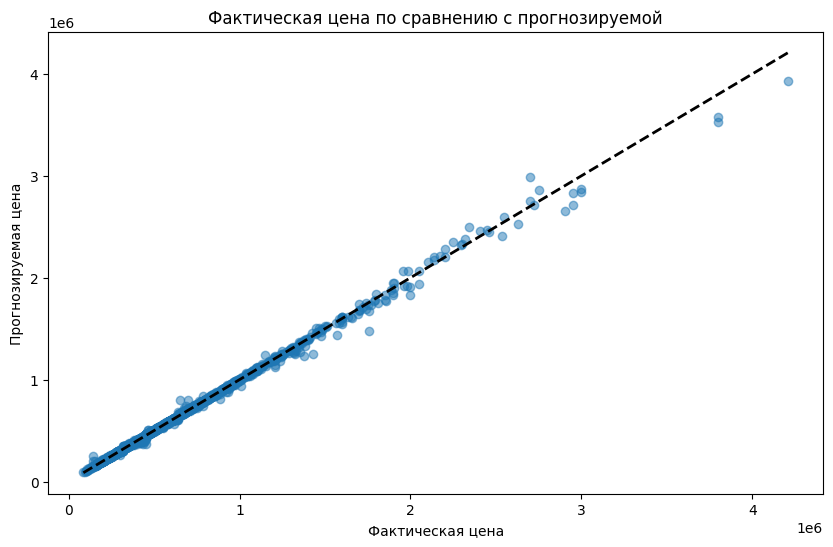

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

# Удаление строк с NaN
feature_matrix = feature_matrix.dropna()
val_feature_matrix = val_feature_matrix.dropna()
test_feature_matrix = test_feature_matrix.dropna()

# Разделение данных на обучающую и тестовую выборки
X_train = feature_matrix.drop('price', axis=1)
y_train = feature_matrix['price']
X_val = val_feature_matrix.drop('price', axis=1)
y_val = val_feature_matrix['price']
X_test = test_feature_matrix.drop('price', axis=1)
y_test = test_feature_matrix['price']

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)  

# Кодирования категориальных переменных с использованием одноразового кодирования
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print()
print(f"RMSE: {rmse}")
print(f"R²: {r2}")
print(f"MAE: {mae} \n")

# Кросс-валидация
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv = (-scores.mean())**0.5
print(f"Кросс-валидация RMSE: {rmse_cv} \n")

# Анализ важности признаков
feature_importances = model.feature_importances_
feature_names = X_train.columns

# Проверка на переобучение
y_train_pred = model.predict(X_train)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

print(f"Train RMSE: {rmse_train}")
print(f"Train R²: {r2_train}")
print(f"Train MAE: {mae_train}")
print()

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Фактическая цена')
plt.ylabel('Прогнозируемая цена')
plt.title('Фактическая цена по сравнению с прогнозируемой')
plt.show()

# Выводы и итог
## Модель случайного леса 
RandomForestRegressor продемонстрировала удовлетворительные результаты в прогнозировании цен на недвижимость. Метрики качества и кросс-валидация позволяют предположить, что модель не склонна к значительному переобучению и может быть пригодна для практического использования.

## Точность предсказаний: 
Модель показала высокий коэффициент детерминации (R²) равный 0.9987, что свидетельствует о том, что большая часть вариации цен на недвижимость объясняется моделью. Однако, значения RMSE и MAE остаются относительно высокими (12930 и 2495 соответственно), что указывает на то, что модель не всегда точно предсказывает цены, особенно для объектов с экстремальными значениями.

## Переобучение: 
Разница между RMSE на обучающей и тестовой выборках незначительна, что говорит о том, что модель не склонна к переобучению. Тем не менее, в будущем необходимо внимательно следить за этой метрикой при добавлении новых признаков или усложнении модели, чтобы избежать излишней подгонки под тренировочные данные.

## Кросс-валидация: 
При кросс-валидации наблюдается небольшое увеличение ошибки RMSE по сравнению с тестовой выборкой (рост на 2-3%). Это может указывать на некоторую нестабильность модели при использовании разных подвыборок данных. Для повышения устойчивости модели рекомендуется провести дальнейшую настройку гиперпараметров.

### Рекомендации:
Мониторинг ошибок: Продолжать следить за RMSE и MAE, особенно при добавлении новых признаков.
Настройка гиперпараметров: Провести более детальную настройку гиперпараметров модели для повышения её устойчивости и точности.
Анализ выбросов: Рассмотреть возможность обработки выбросов в данных, чтобы улучшить качество предсказаний для экстремальных значений цен.#